In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Poland'

link = 'https://rally-base.com/2023/rally-poland-2023/?ssId='
startat, no_ss=7539, int(16) # starting number of url, count of Special Stages
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
   
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data.columns)
    
    equal = '-' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

    rally_23.append(data)

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2023_stages['No.'] = rally2023_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:10]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No.,Crew,Group,SS time,Aver. speed sec/km,Diff.Leader Diff.Prev.,ss,Race,cou
1,1,6,Marczyk M,RC2,00:01:47.7,83.57 0.00,00:00:00.0 00:00:00.0,1,Poland,1
2,2,1,Paddon Ha,RC2,00:01:48.6,82.87 0.36,00:00:00.9 00:00:00.9,1,Poland,2
3,3,22,Cais Erik,RC2,00:01:48.8,82.72 0.44,00:00:01.1 00:00:00.2,1,Poland,3
4,4,2,Llarena E,RC2,00:01:49.0,82.57 0.52,00:00:01.3 00:00:00.2,1,Poland,4
5,5,11,Grzyb Grz,RC2,00:01:49.7,82.04 0.80,00:00:02.0 00:00:00.7,1,Poland,5
...,...,...,...,...,...,...,...,...,...,...
39,39,58,Jocz Tymo,RC4,00:06:54.7,81.59 9.68,00:01:31.0 00:00:08.4,16,Poland,39
40,40,48,Spitalier,RC4,00:06:55.1,81.51 9.73,00:01:31.4 00:00:00.4,16,Poland,40
41,41,46,Raftery A,RC4,00:07:09.4,78.81 11.24,00:01:45.7 00:00:14.3,16,Poland,41
42,42,51,Kreuter N,RC4,00:07:14.0,77.96 11.74,00:01:50.3 00:00:04.6,16,Poland,42


In [5]:
rally2023_stageClass=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2023_ClassView = rally2023_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2023_ClassView2 = rally2023_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView2 = rally2023_ClassView2.fillna("-")


In [6]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [7]:

rally2023_ClassView2

0                           Pos.                                              \
ss                            1   2   3   4   5   6   7   8   9   10  11  12   
No. Crew       Group Race                                                      
1   Paddon  Ha RC2   Poland    2   2   1   1   2   2   2   1   1   2   6   2   
2   Llarena  E RC2   Poland    4  11  11  10  11  12   9   4  16  17  15  16   
3   Østberg  M RC2   Poland   16   7   6   5   4   6   3  13   7   4   4   4   
4   Kristensso RC2   Poland    6  55  56  52   -   -   -   -   -   -   -   -   
5   Mabellini  RC2   Poland    7   8   7   6  10   3   5   4   9  10   8   9   
6   Marczyk  M RC2   Poland    1  12   2   3   3   5   4   8   3   3   2   2   
7   Franceschi RC2   Poland    9   6   7   7   7   4   6  13   6   6   7   7   
8   Sesks  M.  RC2   Poland   22   1   3   2   1   1   1   7   2   1   1   1   
9   Nucita  An RC2   Poland   10  22  16  52  48   -   -   -   -   -   -   -   
10  Heikkilä   RC2   Poland   11   3   9   9   6  10   7  23   4   5   5   5   
11  Grzyb  Grz RC2   Poland    5  13  14  12  17  16  15   6  21  20  14  17   
12  Tempestini RC2   Poland    7   5   4   8  12   8  11   1   8   8   9  10   
14  Mareš  Fil RC2   Poland   13   9  10  24   8  11  14   3  11  15  12   8   
15  Tidemand   RC2   Poland   15  15  13  13  14  15  12  15  20  19  20  18   
16  László  Ma RC2   Poland   11  23  23  19  18  14  16   8  14  11   9  11   
17  Plachytka  RC2   Poland   18  18  25  17  19  22  20  21  22  21  22  22   
19  Byśkiniewi RC2   Poland   14  20  18  18  21  19  19  11  17  18  21  14   
21  McErlean   RC2   Poland   16   4   5   4   9   7   8  10   5   7   3   6   
22  Cais  Erik RC2   Poland    3  10  12  11   5   9   9  11  12  13  11  12   
23  Pryce  Osi RC2   Poland   20  19  21  20  16  18  17  18  15  13  19  15   
24  Campedelli RC2   Poland   19  16  15  14  13  13  13  17  19  22  18  20   
25  Rådström   RC2   Poland   21  14  17  15  15  17  18  20  10   9  13  12   
26  Kołtun  J. RC2   Poland   23  25  20  21  22  21  21  15  23  24  23  23   
28  Somaschini RC2   Poland   30  42  40  42  27  33  31  24  36  39  32  29   
29  Cuzma  Bog RC2   Poland   27  28  30  52  48  45   -   -   -   -   -   -   
30  Bertolotti RC2   Poland   31  31  27  35  32  45  43  43  37  35  39  36   
60  Szeja  Jar RC2   Poland   26  17  19  52  48  45  43  43  13  12  16  21   
61  Uger  Serg RC2   Poland   58  47  46  46  48  45  43  43   -   -   -   -   

0                                            
ss                           13  14  15  16  
No. Crew       Group Race                    
1   Paddon  Ha RC2   Poland   6   8  13   3  
2   Llarena  E RC2   Poland  10  10  11   7  
3   Østberg  M RC2   Poland   4   3   1   1  
4   Kristensso RC2   Poland   -   -   -   -  
5   Mabellini  RC2   Poland   8   -   -   -  
6   Marczyk  M RC2   Poland   2   2   4  10  
7   Franceschi RC2   Poland   5   5   7   3  
8   Sesks  M.  RC2   Poland   3   1   3   5  
9   Nucita  An RC2   Poland   -   -   -   -  
10  Heikkilä   RC2   Poland   1   4   1   2  
11  Grzyb  Grz RC2   Poland  16  16  14  14  
12  Tempestini RC2   Poland  12   9   9   6  
14  Mareš  Fil RC2   Poland  14  12   5   9  
15  Tidemand   RC2   Poland  13  18  12  15  
16  László  Ma RC2   Poland   -   -   -   -  
17  Plachytka  RC2   Poland  17  17  20  13  
19  Byśkiniewi RC2   Poland  21  19  17  20  
21  McErlean   RC2   Poland  18   5  10   8  
22  Cais  Erik RC2   Poland   7   7   6  12  
23  Pryce  Osi RC2   Poland  15  13  18  19  
24  Campedelli RC2   Poland  11  20   8  16  
25  Rådström   RC2   Poland   9  11  15  11  
26  Kołtun  J. RC2   Poland  22  21  21  21  
28  Somaschini RC2   Poland  30  31  24  24  
29  Cuzma  Bog RC2   Poland   -   -   -   -  
30  Bertolotti RC2   Poland  35  32  28  34  
60  Szeja  Jar RC2   Poland  19  14  19  17  
61  Uger  Serg RC2   Poland   -   -   -   -

In [8]:
rally2023_ClassView

0                           Pos.                                              \
ss                            1   2   3   4   5   6   7   8   9   10  11  12   
No. Crew       Group Race                                                      
1   Paddon  Ha RC2   Poland    2   2   1   1   2   2   2   1   1   2   6   2   
2   Llarena  E RC2   Poland    4  11  11  10  11  12   9   4  16  17  15  16   
3   Østberg  M RC2   Poland   16   7   6   5   4   6   3  13   7   4   4   4   
4   Kristensso RC2   Poland    6  55  56  52   -   -   -   -   -   -   -   -   
5   Mabellini  RC2   Poland    7   8   7   6  10   3   5   4   9  10   8   9   
6   Marczyk  M RC2   Poland    1  12   2   3   3   5   4   8   3   3   2   2   
7   Franceschi RC2   Poland    9   6   7   7   7   4   6  13   6   6   7   7   
8   Sesks  M.  RC2   Poland   22   1   3   2   1   1   1   7   2   1   1   1   
9   Nucita  An RC2   Poland   10  22  16  52  48   -   -   -   -   -   -   -   
10  Heikkilä   RC2   Poland   11   3   9   9   6  10   7  23   4   5   5   5   
11  Grzyb  Grz RC2   Poland    5  13  14  12  17  16  15   6  21  20  14  17   
12  Tempestini RC2   Poland    7   5   4   8  12   8  11   1   8   8   9  10   
14  Mareš  Fil RC2   Poland   13   9  10  24   8  11  14   3  11  15  12   8   
15  Tidemand   RC2   Poland   15  15  13  13  14  15  12  15  20  19  20  18   
16  László  Ma RC2   Poland   11  23  23  19  18  14  16   8  14  11   9  11   
17  Plachytka  RC2   Poland   18  18  25  17  19  22  20  21  22  21  22  22   
19  Byśkiniewi RC2   Poland   14  20  18  18  21  19  19  11  17  18  21  14   
21  McErlean   RC2   Poland   16   4   5   4   9   7   8  10   5   7   3   6   
22  Cais  Erik RC2   Poland    3  10  12  11   5   9   9  11  12  13  11  12   
23  Pryce  Osi RC2   Poland   20  19  21  20  16  18  17  18  15  13  19  15   
24  Campedelli RC2   Poland   19  16  15  14  13  13  13  17  19  22  18  20   
25  Rådström   RC2   Poland   21  14  17  15  15  17  18  20  10   9  13  12   
26  Kołtun  J. RC2   Poland   23  25  20  21  22  21  21  15  23  24  23  23   
28  Somaschini RC2   Poland   30  42  40  42  27  33  31  24  36  39  32  29   
29  Cuzma  Bog RC2   Poland   27  28  30  52  48  45   -   -   -   -   -   -   
30  Bertolotti RC2   Poland   31  31  27  35  32  45  43  43  37  35  39  36   
31  Armstrong  RC3   Poland   24  21  22  16  20  20  42  19  18  16  17  19   
32  Parys  Pio RC3   Poland   25  26  29  23  52  49  46  46  25  23  24  26   
33  Matulka  J RC3   Poland   29  27  24  25  24  24  22  22  24  50  50  50   
34  Soria  Pau RC3   Poland   28  24  54  22  23  23  46  46   -   -   -   -   
35  Daprà  Rob RC4   Poland   34  33  32  29  34  30  27  32  33  27  30  34   
36  Jalava  Mi RC4   Poland   49  45  43  41  33  35  29  38  34  41  46  39   
37  McRae  Max RC4   Poland   33  44  42  40  40  37  30  32  51  33  33  30   
38  Andersson  RC4   Poland   40  34  37  33  53  50   -   -   -   -   -   -   
39  Hansen  Vi RC4   Poland   51  37  33  30  29  27  28  37  30  29  27  25   
40  Herczig  P RC4   Poland   37  32  38  34  53  50  48  48  39  36  41  38   
41  Johansson  RC4   Poland   31  40  35  32  45  29  26  31  31  45  34  32   
42  Kramer  A. RC4   Poland   43  51  49  48  44  40  36  29  47   -   -   -   
43  Maior  Nor RC4   Poland   36  36  34  28  30  28  25  27  32  31  28  27   
44  Noller  Re RC4   Poland   41  43  41  38  31  31  48  48   -   -   -   -   
45  Nore  Ola  RC4   Poland   38  29  28  27  26  26  24  35  27  28  25  30   
46  Raftery  A RC4   Poland   56  50  51  49  41  43  38  41  45  46  44  43   
47  Schulz  Ti RC4   Poland   38  38  31  31  25  50  48  48  38  30  36  46   
48  Spitalier  RC4   Poland   48  56  47  56  53  50  48  48  50  48  45  42   
49  Zanin  Mat RC4   Poland   49  48  48  45  35  38  40  32  43  42  40  45   
50  Zeiringer  RC4   Poland   47  41  39  37  46  50  48  48   -   -   -   -   
51  Kreuter  N RC4   Poland   54  54  52  51  47  44  41  39  49  49  49  47   


In [9]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3600 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,6,Marczyk M,RC2,1,Poland,1,107.7
2,1,Paddon Ha,RC2,1,Poland,2,108.6
3,22,Cais Erik,RC2,1,Poland,3,108.8
4,2,Llarena E,RC2,1,Poland,4,109.0
5,11,Grzyb Grz,RC2,1,Poland,5,109.7
...,...,...,...,...,...,...,...
39,58,Jocz Tymo,RC4,16,Poland,39,414.7
40,48,Spitalier,RC4,16,Poland,40,415.1
41,46,Raftery A,RC4,16,Poland,41,429.4
42,51,Kreuter N,RC4,16,Poland,42,434.0


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race   ss          
Poland 1      107.7
       2      591.9
       3      409.5
       4      498.7
       5      591.8
       6      406.7
       7      496.9
       8      108.1
       9      312.0
       10     389.2
       11     325.3
       12     208.7
       13     316.0
       14     387.9
       15     211.5
       16     323.7

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time
0,6,Marczyk M,RC2,1,Poland,1,107.7,107.7
1,1,Paddon Ha,RC2,1,Poland,2,108.6,107.7
2,22,Cais Erik,RC2,1,Poland,3,108.8,107.7
3,2,Llarena E,RC2,1,Poland,4,109.0,107.7
4,11,Grzyb Grz,RC2,1,Poland,5,109.7,107.7
...,...,...,...,...,...,...,...,...
835,58,Jocz Tymo,RC4,16,Poland,39,414.7,323.7
836,48,Spitalier,RC4,16,Poland,40,415.1,323.7
837,46,Raftery A,RC4,16,Poland,41,429.4,323.7
838,51,Kreuter N,RC4,16,Poland,42,434.0,323.7


In [13]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,6,Marczyk M,RC2,1,Poland,1,107.7,107.7,0.0,0.000000,01
1,1,Paddon Ha,RC2,1,Poland,2,108.6,107.7,0.9,0.835655,01
2,22,Cais Erik,RC2,1,Poland,3,108.8,107.7,1.1,1.021356,01
3,2,Llarena E,RC2,1,Poland,4,109.0,107.7,1.3,1.207057,01
4,11,Grzyb Grz,RC2,1,Poland,5,109.7,107.7,2.0,1.857010,01
...,...,...,...,...,...,...,...,...,...,...,...
835,58,Jocz Tymo,RC4,16,Poland,39,414.7,323.7,91.0,28.112450,16
836,48,Spitalier,RC4,16,Poland,40,415.1,323.7,91.4,28.236021,16
837,46,Raftery A,RC4,16,Poland,41,429.4,323.7,105.7,32.653692,16
838,51,Kreuter N,RC4,16,Poland,42,434.0,323.7,110.3,34.074761,16


In [14]:
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains('RC2')]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,6,Marczyk M,RC2,1,Poland,1,107.7,107.7,0.0,0.000000,01
1,1,Paddon Ha,RC2,1,Poland,2,108.6,107.7,0.9,0.835655,01
2,22,Cais Erik,RC2,1,Poland,3,108.8,107.7,1.1,1.021356,01
3,2,Llarena E,RC2,1,Poland,4,109.0,107.7,1.3,1.207057,01
4,11,Grzyb Grz,RC2,1,Poland,5,109.7,107.7,2.0,1.857010,01
...,...,...,...,...,...,...,...,...,...,...,...
815,23,Pryce Osi,RC2,16,Poland,19,342.8,323.7,19.1,5.900525,16
816,19,Byśkiniewi,RC2,16,Poland,20,345.4,323.7,21.7,6.703738,16
817,26,Kołtun J.,RC2,16,Poland,21,356.1,323.7,32.4,10.009268,16
820,28,Somaschini,RC2,16,Poland,24,375.3,323.7,51.6,15.940686,16


In [15]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,6,Marczyk M,RC2,1,Poland,1,107.7,107.7,0.0,0.000000,01
1,1,Paddon Ha,RC2,1,Poland,2,108.6,107.7,0.9,0.835655,01
2,22,Cais Erik,RC2,1,Poland,3,108.8,107.7,1.1,1.021356,01
3,2,Llarena E,RC2,1,Poland,4,109.0,107.7,1.3,1.207057,01
4,11,Grzyb Grz,RC2,1,Poland,5,109.7,107.7,2.0,1.857010,01
...,...,...,...,...,...,...,...,...,...,...,...
815,23,Pryce Osi,RC2,16,Poland,19,342.8,323.7,19.1,5.900525,16
816,19,Byśkiniewi,RC2,16,Poland,20,345.4,323.7,21.7,6.703738,16
817,26,Kołtun J.,RC2,16,Poland,21,356.1,323.7,32.4,10.009268,16
820,28,Somaschini,RC2,16,Poland,24,375.3,323.7,51.6,15.940686,16


In [16]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race       Poland                                                         \
SS.            01     02     03     04     05     06     07     08    09   
Crew                                                                       
Bertolotti   13.8   90.3   49.6   77.2  116.5  600.0  600.0  600.0  63.0   
Byśkiniewi    2.9   34.9   19.9   27.3   38.5   23.9   30.8    1.6  18.6   
Cais  Erik    1.1   19.0   11.3   13.6   11.5    7.9   10.8    1.6  13.5   
Campedelli    3.3   28.8   16.0   19.1   20.9   11.3   15.0    2.0  19.6   
Cuzma  Bog    8.5   65.8   53.2  600.0  600.0  600.0    NaN    NaN   NaN   
Franceschi    2.3   15.9    8.6    8.8   13.7    4.4    4.9    1.7   6.8   
Grzyb  Grz    2.0   24.2   15.7   13.7   28.2   16.0   19.6    1.2  20.5   
Heikkilä      2.6   11.5    9.4    9.3   11.6    8.0    7.2    4.4   5.1   
Kołtun  J.    4.8   49.6   23.7   39.4   47.4   25.8   40.5    1.9  27.0   
Kristensso    2.1  201.3  600.0  600.0    NaN    NaN    NaN    NaN   NaN   
Llarena  E    1.3   21.4   10.6    9.9   18.4    9.8   10.8    1.1  17.7   
László  Ma    2.6   40.2   26.1   31.2   31.3   14.5   22.1    1.4  16.3   
Mabellini     2.2   18.3    8.6    8.7   15.7    4.2    4.8    1.1  11.0   
Marczyk  M    0.0   21.6    0.9    6.4    7.9    5.4    4.6    1.4   3.2   
Mareš  Fil    2.7   18.9    9.9   49.8   14.0    8.3   15.1    0.3  13.0   
McErlean      3.1   12.0    4.2    6.9   14.4    6.6    8.2    1.5   5.3   
Nucita  An    2.4   36.8   17.4  600.0  600.0    NaN    NaN    NaN   NaN   
Paddon  Ha    0.9    3.2    0.0    0.0    7.6    1.7    1.6    0.0   0.0   
Plachytka     3.2   32.3   40.7   26.8   35.5   27.9   40.4    3.8  25.6   
Pryce  Osi    3.4   33.2   25.1   34.8   27.5   19.0   25.2    2.9  17.1   
Rådström      4.2   24.7   18.0   21.8   22.8   18.2   27.2    3.7  11.8   
Sesks  M.     4.3    0.0    1.0    0.2    0.0    0.0    0.0    1.3   0.8   
Somaschini    9.8  105.4   63.2   89.8   95.1   63.3   88.0    7.5  56.7   
Szeja  Jar    8.1   31.8   22.2  600.0  600.0  600.0  600.0  600.0  16.0   
Tempestini    2.2   13.6    3.4    9.0   19.0    7.3   11.1    0.0   9.3   
Tidemand      3.0   28.2   14.0   14.0   21.8   15.4   13.8    1.9  20.1   
Uger  Serg   50.1  124.0   72.2  103.2  600.0  600.0  600.0  600.0   NaN   
Østberg  M    3.1   17.4    8.1    7.1   10.9    6.2    3.9    1.7   7.5   

Race                                                  
SS.           10    11    12    13    14    15    16  
Crew                                                  
Bertolotti  76.3  62.1  42.6  79.1  76.8  46.0  66.7  
Byśkiniewi  27.7  19.6   9.7  29.3  26.8  13.1  21.7  
Cais  Erik  22.6  13.6   9.5   5.1   9.6   4.5  10.6  
Campedelli  36.1  18.6  12.6  10.0  38.7   6.7  13.8  
Cuzma  Bog   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Franceschi   9.0   4.9   5.3   3.7   5.5   4.6   1.7  
Grzyb  Grz  34.0  16.0  12.0  16.4  23.9  10.5  12.3  
Heikkilä     8.8   4.0   2.4   0.0   4.3   0.0   0.3  
Kołtun  J.  51.0  30.3  21.4  36.6  43.4  20.8  32.4  
Kristensso   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Llarena  E  26.0  16.4  10.8   9.5  12.9   7.8   5.1  
László  Ma  19.4  11.3   8.9   NaN   NaN   NaN   NaN  
Mabellini   17.3  10.8   7.3   7.2   NaN   NaN   NaN  
Marczyk  M   6.7   2.9   1.5   1.0   3.6   2.9   7.1  
Mareš  Fil  23.0  14.5   7.2  13.7  13.4   3.0   6.5  
McErlean    11.5   3.6   3.3  19.9   5.5   7.2   5.9  
Nucita  An   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Paddon  Ha   5.9   4.4   1.5   4.9   9.7   8.7   1.7  
Plachytka   34.2  22.3  20.7  17.8  25.9  16.6  11.1  
Pryce  Osi  22.6  18.9  10.2  15.1  17.2  13.9  19.1  
Rådström    16.8  15.3   9.5   8.3  13.2  11.2   9.6  
Sesks  M.    0.0   0.0   0.0   1.1   0.0   1.2   2.3  
Somaschini  83.1  52.7  37.6  61.2  73.3  38.6  51.6  
Szeja  Jar  22.5  18.1  14.5  21.9  19.8  15.9  15.5  
Tempestini  15.6  11.3   7.6  10.2   9.9   7.0   4.9  
Tidemand    30.2  19.5  12.1  13.6  26.0   7.9  12.6  
Uger  Serg   NaN   NaN   NaN   NaN   NaN   NaN  

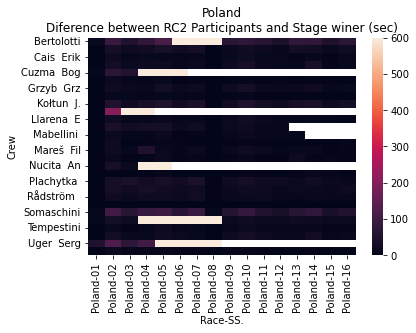

In [17]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between RC2 Participants and Stage winer (sec)')
plt.savefig("Heatmap_ALL.png")

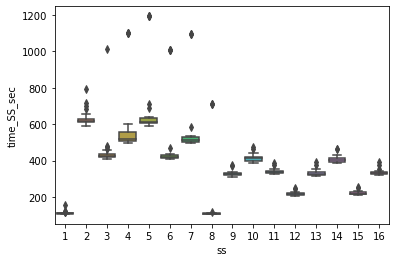

In [18]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])

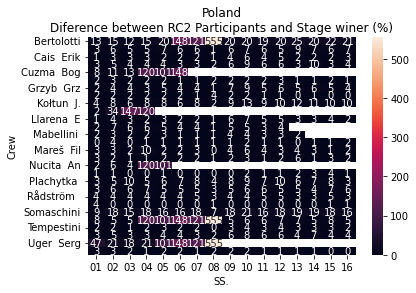

In [19]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between RC2 Participants and Stage winer (%)')
plt.savefig("Rc2.jpg")